In [1]:
from Bandit import *

In [2]:
Bandit_Reward = [1,2,3,4]
NumberOfTrials = 20000
eps = 0.1

In [3]:
egreedy = EpsilonGreedy(Bandit)
egreedy_rewards, num_times_explored, num_times_exploited, num_optimal = egreedy.experiment(Bandit_Reward, 10, NumberOfTrials)

optimal bandit index: 3
Estimated average reward: epsilon = 4.9975012493753125e-05: [1.011, 3.532, 0, 4.001]


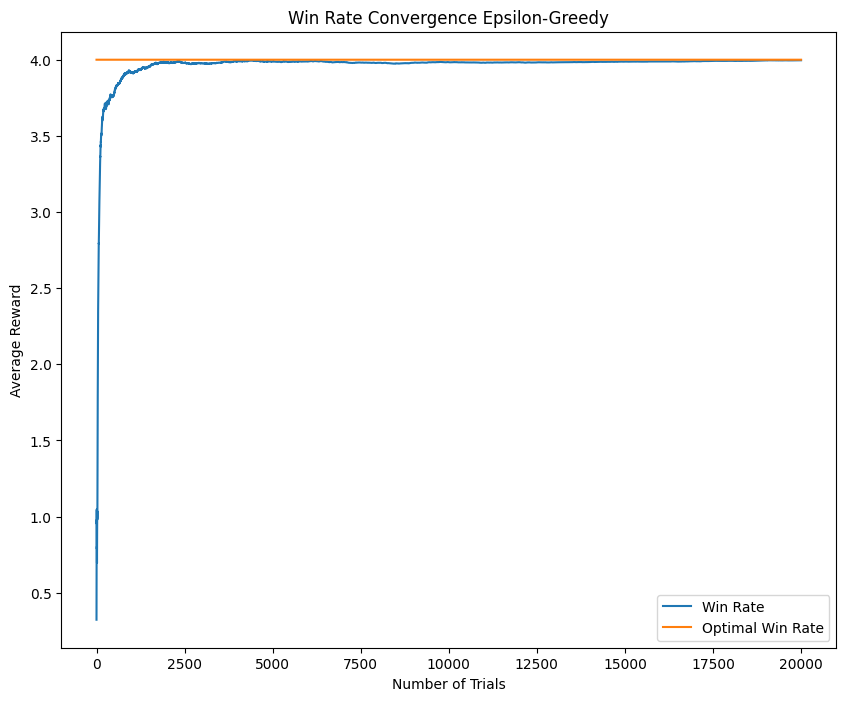

In [4]:
egreedy.plot_learning_process(Bandit_Reward, egreedy_rewards, NumberOfTrials)

In [5]:

df = egreedy.report(egreedy_rewards, num_times_explored, num_times_exploited, num_optimal, NumberOfTrials)


Total Reward Earned: 79928.33778672849
Average Reward: 3.9964168893364245
Overall Win Rate: 3.9964
# of explored: 7
# of exploited: 19993
# of times selected the optimal bandit: 19971


In [6]:
egreedy_cumulative_rewards = egreedy_rewards.cumsum()
print("Epsilon Greedy Cumulative Reward:", max(egreedy_cumulative_rewards))

Epsilon Greedy Cumulative Reward: 79928.3377867285


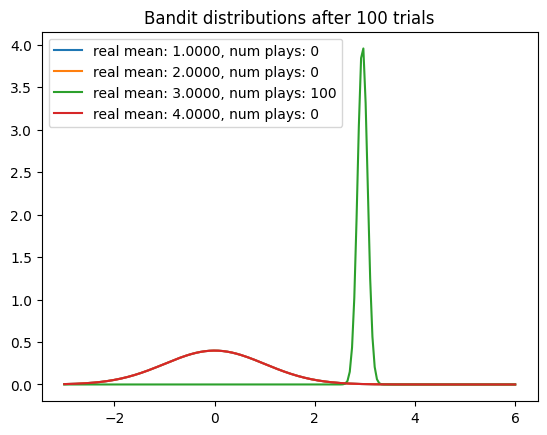

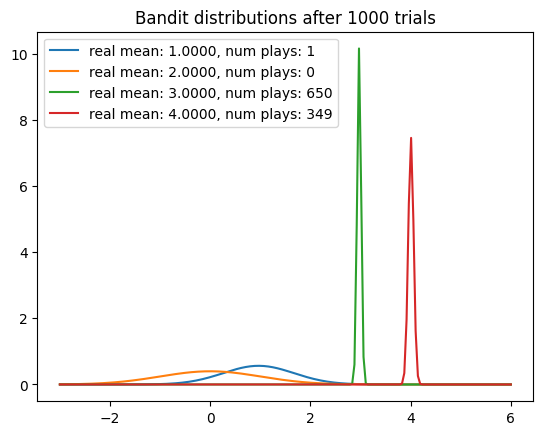

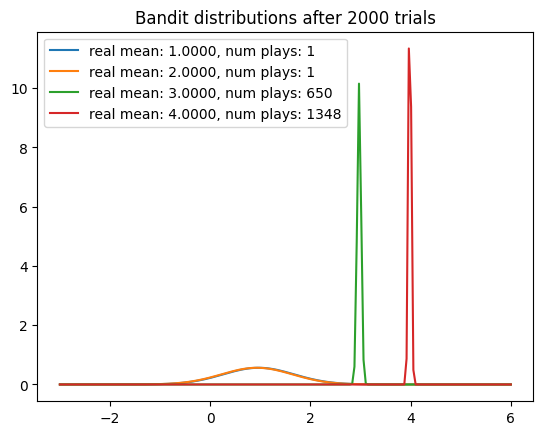

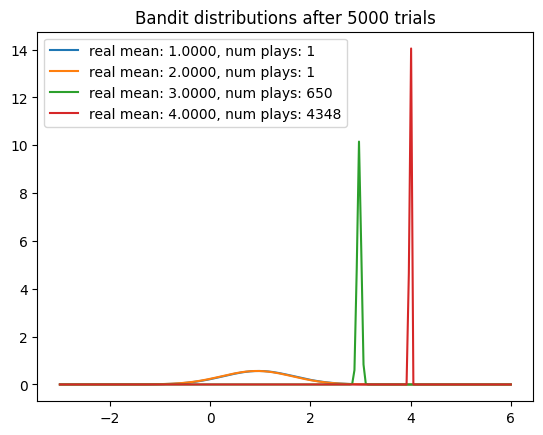

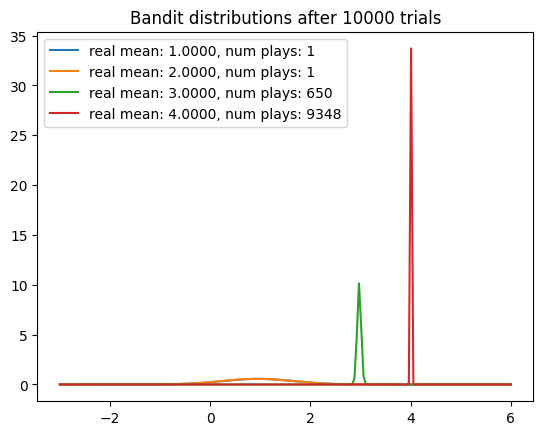

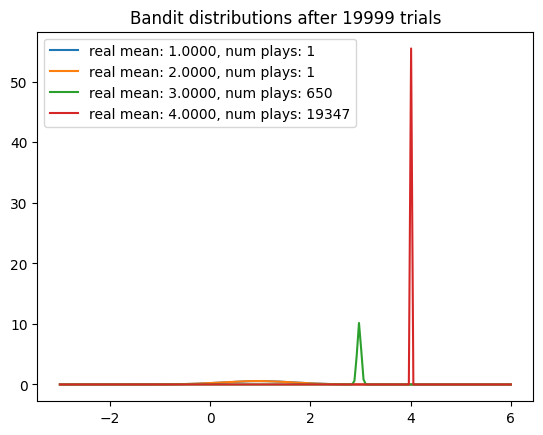

In [7]:
thompson = ThompsonSampling(Bandit)
bandits, thompson_rewards = thompson.experiment(Bandit_Reward, NumberOfTrials)

In [8]:
thompson_cumulative_rewards = thompson_rewards.cumsum()

print("Thompson Sampling Cumulative Reward:", max(thompson_cumulative_rewards))

optimal_reward = max(max(egreedy_rewards), max(thompson_rewards))

# Calculate cumulative regret for Epsilon Greedy
egreedy_rewards_ = optimal_reward - egreedy_rewards
epsilon_greedy_cumulative_regret = egreedy_rewards_.cumsum()

# Calculate cumulative regret for Thompson Sampling
thompson_rewards_ = optimal_reward - thompson_rewards
thompson_sampling_cumulative_regret = thompson_rewards_.cumsum()

print("Epsilon Greedy Cumulative Regret:", epsilon_greedy_cumulative_regret[-1])
print("Thompson Sampling Cumulative Regret:", thompson_sampling_cumulative_regret[-1])

Thompson Sampling Cumulative Reward: 79529.26057819344
Epsilon Greedy Cumulative Regret: 79548.24898141358
Thompson Sampling Cumulative Regret: 79947.32618994868


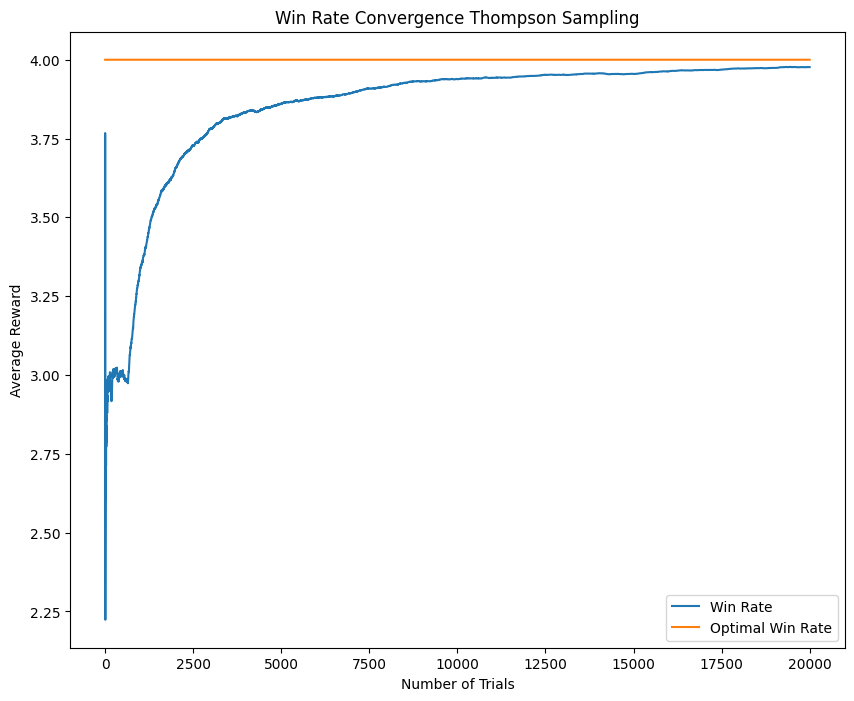

In [9]:
thompson.plot_learning_process(Bandit_Reward, thompson_rewards, NumberOfTrials)

In [10]:
df = thompson.report(bandits, thompson_rewards, NumberOfTrials)

Total Reward Earned: 79529.26057819309
Average Reward: 3.9764630289096545
Overall Win Rate: 3.9764630289096545
Number of times selected each bandit: [1, 1, 650, 19348]


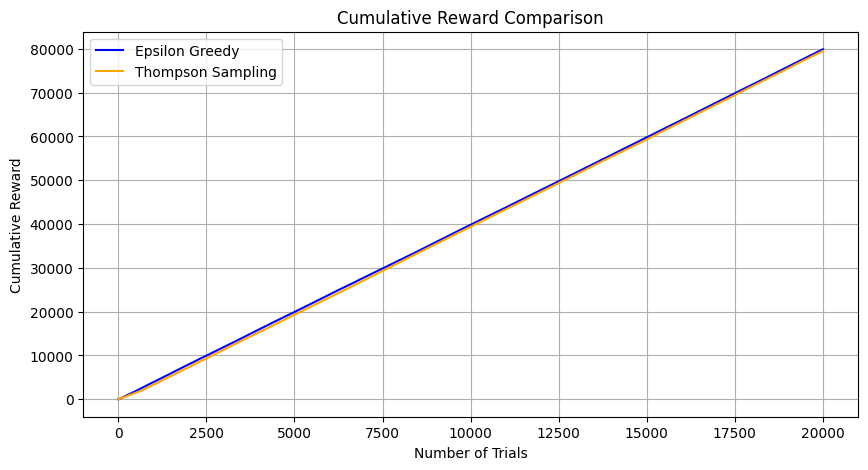

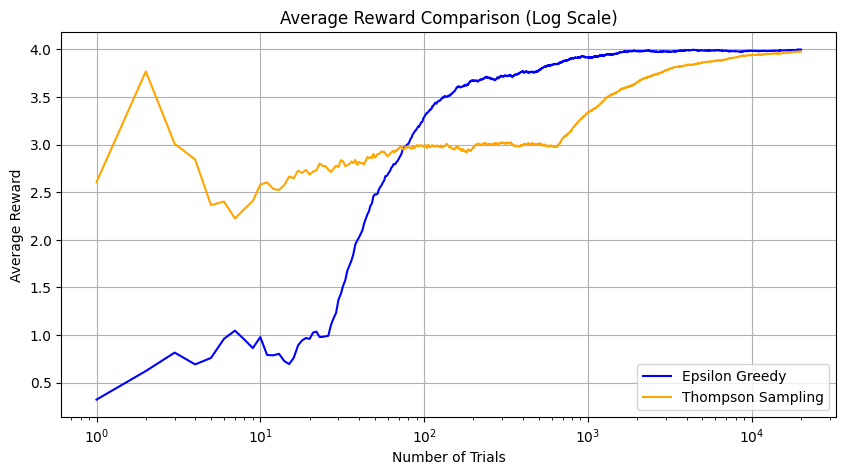

In [11]:
plot = Visualization()
plot.plot1(egreedy_rewards, thompson_rewards)

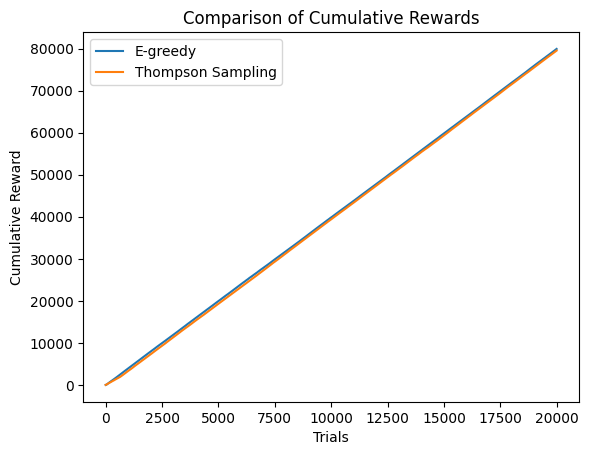

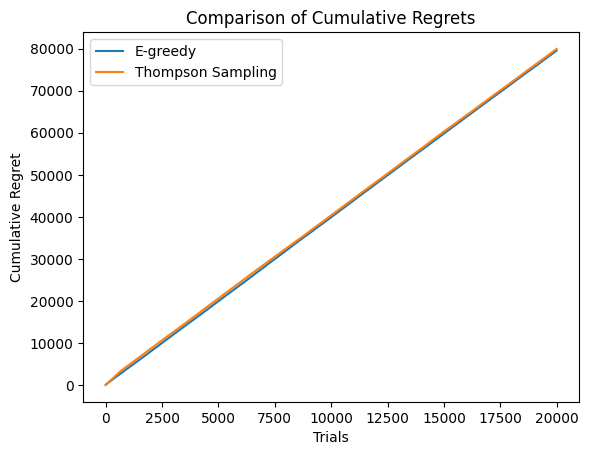

In [12]:
plot.plot2(egreedy_cumulative_rewards, thompson_cumulative_rewards, epsilon_greedy_cumulative_regret, thompson_sampling_cumulative_regret)

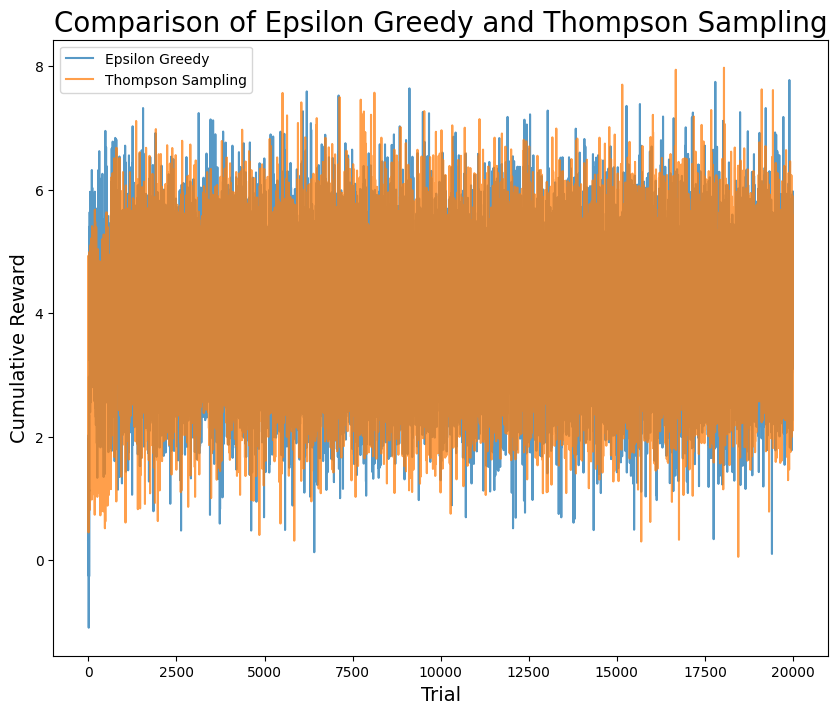

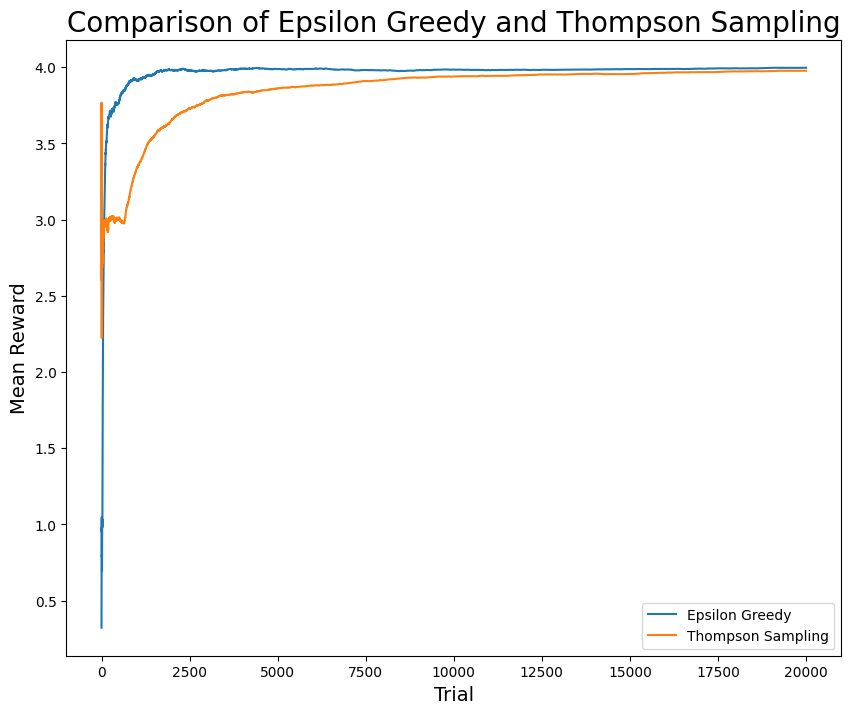

In [13]:
comparison(egreedy_rewards, thompson_rewards)